# Lead Score vans empresas

In [1]:
#referencias:
#https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
#https://www.kaggle.com/tboyle10/methods-for-dealing-with-imbalanced-data
#https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b


#Area de Analytics - Comercial Kaufmann
#creado por Sebastian Alibaud



# CARGA DE PAQUETES

In [2]:
# quitamos alertas porfavor!
import warnings
warnings.filterwarnings('ignore')

In [3]:
# librerias clasicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ploteos
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn.metrics import roc_curve,confusion_matrix,accuracy_score,recall_score
from sklearn.metrics import f1_score,precision_score,roc_auc_score,average_precision_score


#modelos
from sklearn.model_selection import train_test_split
from  sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.svm import SVC
#from sklearn.linear_model import RidgeClassifier,SGDClassifier,LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,average_precision_score
#from sklearn.neighbors import NearestNeighbors
import xgboost as xgb


### Funciones utiles

In [4]:
#funciones para medir

def mediciones(x_train,y_train,x_test,y_test,model):
    a = int(accuracy_score(y_train,model.predict(x_train))*1000)/1000
    b = int(recall_score(y_train,model.predict(x_train))*1000)/1000
    c = int(accuracy_score(y_test,model.predict(x_test))*1000)/1000
    d = int(recall_score(y_test,model.predict(x_test))*1000)/1000
    aa = int(roc_auc_score(y_train,model.predict_proba(x_train)[:,1])*1000)/1000
    cc = int(roc_auc_score(y_test,model.predict_proba(x_test)[:,1])*1000)/1000
    dd = int(f1_score(y_test,model.predict(x_test))*1000)/1000
    ee = int(f1_score(y_train,model.predict(x_train))*1000)/1000
    e = {'Entrenamiento':[a,b,aa,ee],
         'Testeo':[c,d,cc,dd]}
    f = pd.DataFrame(data=e,index=["Accuracy","recall","roc","f1"])
    matrix=confusion_matrix(y_test,model.predict(x_test))
    TP=matrix[1,1]
    TN=matrix[0,0]
    FP=matrix[0,1]
    FN=matrix[1,0]
    ma = {'Prediccion falso':[TN,FN],
         'Prediccion verdadero':[FP,TP]}
    i = pd.DataFrame(data=ma,index=["Actual falsa","Actual verdadera"])
    print("Matriz de confusion:\n",i)
    return f



#print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
#fig= plt.figure(figsize=(6,3))# to plot the graph
#print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
#print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
#print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
#print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal


def mediciones2(x_train,y_train,x_test,y_test,model):
    #a = int(accuracy_score(y_train,model.predict(x_train))*1000)/1000
    #b = int(recall_score(y_train,model.predict(x_train))*1000)/1000
    c = int(accuracy_score(y_test,model.predict(x_test))*1000)/1000
    d = int(recall_score(y_test,model.predict(x_test))*1000)/1000
    #aa = int(roc_auc_score(y_train,model.predict_proba(x_train)[:,1])*1000)/1000
    #cc = int(roc_auc_score(y_test,model.predict_proba(x_test)[:,1])*1000)/1000
    e = {'Testeo':[c,d]}
    f = pd.DataFrame(data=e,index=["Accuracy","recall"])
    return f

def roc_(x_train,y_train,x_test,y_test,model):
    aa = int(roc_auc_score(y_train,model.predict_proba(x_train)[:,1])*1000)/1000
    cc = int(roc_auc_score(y_test,model.predict_proba(x_test)[:,1])*1000)/1000
    e = {'Entrenamiento':[a],
         'Testeo':[c]}
    f = pd.DataFrame(data=e,index=["roc-auc"])
    return f

# Preparación de datos
### LECTURA DE BASE BRUTA DESDE SAS


La base de datos se obtiene desde el SAS guardado en la carpeta diaria de Customer analytics, esta base considera todas las ofertas realizadas en kaufmann a clientes que se encuentran en el perfil, se cruza con información de venta, rvm, post venta y datos del SII.


Para el caso de puesta en prd, se consideran todas las empresas presentes en SII mas todos los clientes kaufman, mas todas las personas que están en rvm.


* Periodo de información = 2018 y 2019.
* Modelos: Utilitarios.
* Tipo Cliente: Persona y empresa.

Fuente sii:
http://www.sii.cl/sobre_el_sii/nominapersonasjuridicas.html



In [5]:
#----------------------#
# carga de informacion #
#----------------------#
#lectura de datos
df = pd.read_sas(r"file:\\10.1.1.145\datos\ANALISIS\CHILE\IMPORTER_MARKETING_CUSTOMER_ANALYTICS\DATOS\LEAD_SCORE_UTILITARIOS_TRAIN.sas7bdat",
                    format='sas7bdat',encoding='latin1')

df = df[df['TIPO_CLIENTE']!='PERSONA']
df=df[df['CATEGORIA']=='VANS']

df=df.drop(['TIPO_CLIENTE'], axis=1)

In [6]:
df=df.drop(["CATEGORIA"], axis=1)
df.shape

(81418, 98)

### Base de datos

Cliente	
-Servicio impuestos internos
    
        *Rubro economico
		*Numero trabajadores
		*Tramo ventas
		*Antigüedad Empresa
    
-Parque Vehicular
   
        *Cantidad de flota relevante
		*Antigüedad promedio
		*Compra año actual RVM
	
-CRM	
    
        *Region
        
Producto	

        *Tipo de vehiculo
		*Marca
        
Interaccion

-Post Venta	
        
        *Consume repuestos o servicios PV
	
-Unidades	

        *Numero de ofertas u12m
		*Numero compras u12m
		*Campañas u12m
		*Campañas u12m reacciona
		*Tipo de credito usado ultima compra


### LIMPIEZA DE DATOS POR COLUMNA 

#### columnas numericas

In [7]:
#ahora tratare de revisar cada columna para imputar en caso de que se pueda imputar
df[['NUM_OFERTAS_U12M',
'COMPRAS_REALIZADAS_U12M',
'CAMPANAS_U180D_C',
'CAMPANAS_U180D',
'ANTIGUEDAD_FLOTA',
'FLOTA_NUEVA',
'NUM_TRABAJADORES', 
'TOTAL_UTILITARIOS', 
'UTILITARIOS_EXCLUSION', 
'RELEVANTE_BUSES', 
'RELEVANTE_CAMIONES', 
'RELEVANTE_RODADOS', 
'RELEVANTE_VANS', 
'RELEVANTE_CARGA',
'RELEVANTE_PASAJERA', 
'RELEVANTE_PESADO', 
'RELEVANTE_CAMIONETA', 
'RELEVANTE_MEDIANO', 
'RELEVANTE_OTROS', 
'RELEVANTE_LIVIANO', 
'RELEVANTE_FORESTAL']].describe()

,NUM_OFERTAS_U12M,COMPRAS_REALIZADAS_U12M,CAMPANAS_U180D_C,CAMPANAS_U180D,ANTIGUEDAD_FLOTA,FLOTA_NUEVA,NUM_TRABAJADORES,TOTAL_UTILITARIOS,UTILITARIOS_EXCLUSION,RELEVANTE_BUSES,...,RELEVANTE_RODADOS,RELEVANTE_VANS,RELEVANTE_CARGA,RELEVANTE_PASAJERA,RELEVANTE_PESADO,RELEVANTE_CAMIONETA,RELEVANTE_MEDIANO,RELEVANTE_OTROS,RELEVANTE_LIVIANO,RELEVANTE_FORESTAL
count,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04,...,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04
mean,4.468273e-17,2.792671e-18,-5.585342e-18,9.774348e-18,7.821294e-14,-2.792671e-18,8.378013e-18,-1.675603e-17,2.792671e-18,-3.630472e-17,...,4.049373e-17,1.117068e-17,2.234137e-17,2.234137e-17,5.026808e-17,8.378013e-18,-2.792671e-17,-1.675603e-17,-8.378013e-18,1.326519e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.370475e-01,-2.989590e-01,-2.540986e-01,-2.587623e-01,-5.800997e-01,-5.362872e-01,-2.967554e-01,-2.619910e-01,-1.583319e-01,-1.933818e-01,...,-1.429317e-01,-1.701342e-01,-1.487756e-01,-2.558737e-01,-2.143227e-01,-7.651927e-02,-1.917536e-01,-1.943462e-01,-1.635126e-01,-6.778612e-02
25%,-3.370475e-01,-2.989590e-01,-2.540986e-01,-2.587623e-01,-5.800997e-01,-5.362872e-01,-2.967554e-01,-2.619910e-01,-1.583319e-01,-1.933818e-01,...,-1.429317e-01,-1.701342e-01,-1.487756e-01,-2.558737e-01,-2.143227e-01,-7.651927e-02,-1.917536e-01,-1.943462e-01,-1.635126e-01,-6.778612e-02
50%,-3.323398e-01,-2.989590e-01,-2.540986e-01,-2.587623e-01,-5.800997e-01,-5.362872e-01,-2.921889e-01,-2.619910e-01,-1.583319e-01,-1.933818e-01,...,-1.429317e-01,-1.701342e-01,-1.487756e-01,-2.558737e-01,-2.143227e-01,-7.651927e-02,-1.917536e-01,-1.943462e-01,-1.635126e-01,-6.778612e-02
75%,-3.088010e-01,-2.820436e-01,-2.540986e-01,-2.587623e-01,2.205789e-01,-5.362872e-01,-1.780254e-01,-2.419571e-01,-1.538287e-01,-1.933818e-01,...,-1.429317e-01,-1.456250e-01,-1.487756e-01,-1.616267e-01,-2.143227e-01,-7.651927e-02,-1.917536e-01,-1.706328e-01,-1.635126e-01,-6.778612e-02
max,5.646505e+00,6.044318e+00,2.375370e+01,2.285623e+01,7.026347e+00,1.864649e+00,3.184163e+01,2.953522e+01,3.053577e+01,3.636718e+01,...,6.649934e+01,2.100582e+01,2.261709e+01,3.084562e+01,1.432703e+01,9.373434e+01,2.624367e+01,2.266538e+01,3.733094e+01,6.422733e+01


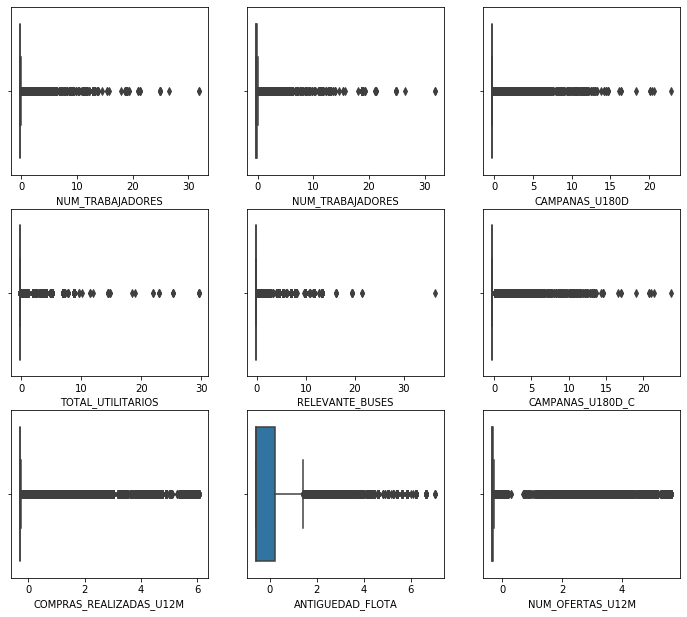

In [8]:
#revision de outliers al azar
fig, axs = plt.subplots(3,3, figsize = (12,10.5))
plt2 = sns.boxplot(df['NUM_TRABAJADORES'], ax = axs[0,0])
plt2 = sns.boxplot(df['NUM_TRABAJADORES'], ax = axs[0,1])
plt2 = sns.boxplot(df['TOTAL_UTILITARIOS'], ax = axs[1,0])
plt2 = sns.boxplot(df['RELEVANTE_BUSES'], ax = axs[1,1])
plt2 = sns.boxplot(df['ANTIGUEDAD_FLOTA'], ax = axs[2,1])
plt2 = sns.boxplot(df['CAMPANAS_U180D_C'], ax = axs[1,2])
plt2 = sns.boxplot(df['NUM_OFERTAS_U12M'], ax = axs[2,2])
plt2 = sns.boxplot(df['CAMPANAS_U180D'], ax = axs[0,2])
plt2 = sns.boxplot(df['COMPRAS_REALIZADAS_U12M'], ax = axs[2,0])

plt.show()

ahi un exceso de variabilidad en algunas columnas (algunos outliers)

In [9]:
# Contar numero de outliers por volumna

lista =['NUM_TRABAJADORES',
'NUM_OFERTAS_U12M',
'COMPRAS_REALIZADAS_U12M',
'CAMPANAS_U180D_C',
'CAMPANAS_U180D',
'ANTIGUEDAD_FLOTA',
'FLOTA_NUEVA',
'NUM_TRABAJADORES', 
'TOTAL_UTILITARIOS', 
'UTILITARIOS_EXCLUSION', 
'RELEVANTE_BUSES', 
'RELEVANTE_CAMIONES', 
'RELEVANTE_RODADOS', 
'RELEVANTE_VANS', 
'RELEVANTE_CARGA',
'RELEVANTE_PASAJERA', 
'RELEVANTE_PESADO', 
'RELEVANTE_CAMIONETA', 
'RELEVANTE_MEDIANO', 
'RELEVANTE_OTROS', 
'RELEVANTE_LIVIANO', 
'RELEVANTE_FORESTAL']
  
df2=df



for i in lista:
    qa02 = df2[i].quantile(0.1)
    qa98 = df2[i].quantile(0.90)
    df2[i] = np.where(df[i] > qa98, df2[i].mean(), df[i])
    df2[i] = np.where(df[i] < qa02, df2[i].mean(), df[i])


In [10]:
df2[['NUM_TRABAJADORES',
'NUM_OFERTAS_U12M',
'COMPRAS_REALIZADAS_U12M',
'CAMPANAS_U180D_C',
'CAMPANAS_U180D',
'ANTIGUEDAD_FLOTA',
'FLOTA_NUEVA',
'NUM_TRABAJADORES', 
'TOTAL_UTILITARIOS', 
'UTILITARIOS_EXCLUSION', 
'RELEVANTE_BUSES', 
'RELEVANTE_CAMIONES', 
'RELEVANTE_RODADOS', 
'RELEVANTE_VANS', 
'RELEVANTE_CARGA',
'RELEVANTE_PASAJERA', 
'RELEVANTE_PESADO', 
'RELEVANTE_CAMIONETA', 
'RELEVANTE_MEDIANO', 
'RELEVANTE_OTROS', 
'RELEVANTE_LIVIANO', 
'RELEVANTE_FORESTAL']].describe()

,NUM_TRABAJADORES,NUM_OFERTAS_U12M,COMPRAS_REALIZADAS_U12M,CAMPANAS_U180D_C,CAMPANAS_U180D,ANTIGUEDAD_FLOTA,FLOTA_NUEVA,NUM_TRABAJADORES,TOTAL_UTILITARIOS,UTILITARIOS_EXCLUSION,...,RELEVANTE_RODADOS,RELEVANTE_VANS,RELEVANTE_CARGA,RELEVANTE_PASAJERA,RELEVANTE_PESADO,RELEVANTE_CAMIONETA,RELEVANTE_MEDIANO,RELEVANTE_OTROS,RELEVANTE_LIVIANO,RELEVANTE_FORESTAL
count,8.141800e+04,81418.000000,81418.000000,81418.000000,81418.000000,8.141800e+04,8.141800e+04,8.141800e+04,81418.000000,8.141800e+04,...,8.141800e+04,8.141800e+04,8.141800e+04,81418.000000,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04,8.141800e+04
mean,-2.368592e-01,-0.283381,-0.252368,-0.192996,-0.198441,-2.441842e-01,-2.792671e-18,-2.368592e-01,-0.220424,-1.401196e-01,...,-1.303551e-01,-1.430134e-01,-1.287807e-01,-0.204690,-1.680522e-01,-7.011713e-02,-1.685842e-01,-1.621860e-01,-1.478609e-01,-6.576714e-02
std,9.452142e-02,0.108225,0.104772,0.140487,0.135424,4.957686e-01,1.000000e+00,9.452142e-02,0.084607,4.491065e-02,...,4.049007e-02,5.227908e-02,4.592273e-02,0.094935,5.821026e-02,2.118738e-02,5.803990e-02,6.046284e-02,4.633500e-02,1.152320e-02
min,-2.967554e-01,-0.337048,-0.298959,-0.254099,-0.258762,-5.800997e-01,-5.362872e-01,-2.967554e-01,-0.261991,-1.583319e-01,...,-1.429317e-01,-1.701342e-01,-1.487756e-01,-0.255874,-2.015110e-01,-7.651927e-02,-1.917536e-01,-1.943462e-01,-1.635126e-01,-6.778612e-02
25%,-2.967554e-01,-0.337048,-0.298959,-0.254099,-0.258762,-5.800997e-01,-5.362872e-01,-2.967554e-01,-0.261991,-1.583319e-01,...,-1.429317e-01,-1.701342e-01,-1.487756e-01,-0.255874,-1.889049e-01,-7.651927e-02,-1.917536e-01,-1.943462e-01,-1.635126e-01,-6.778612e-02
50%,-2.921889e-01,-0.332340,-0.298959,-0.254099,-0.258762,-5.800997e-01,-5.362872e-01,-2.921889e-01,-0.261991,-1.583319e-01,...,-1.429317e-01,-1.701342e-01,-1.487756e-01,-0.255874,-1.889049e-01,-7.651927e-02,-1.917536e-01,-1.943462e-01,-1.635126e-01,-6.778612e-02
75%,-1.824442e-01,-0.308801,-0.282044,-0.254099,-0.258762,7.821294e-14,-5.362872e-01,-1.824442e-01,-0.241957,-1.538287e-01,...,-1.429317e-01,-1.456250e-01,-1.487756e-01,-0.161627,-1.889049e-01,-7.651927e-02,-1.917536e-01,-1.706328e-01,-1.635126e-01,-6.778612e-02
max,8.378013e-18,0.083512,0.293080,0.338687,0.305018,1.421597e+00,1.864649e+00,8.378013e-18,0.005129,2.792671e-18,...,4.049373e-17,1.117068e-17,2.234137e-17,0.121114,5.026808e-17,8.378013e-18,-2.792671e-17,-1.675603e-17,-8.378013e-18,1.326519e-17


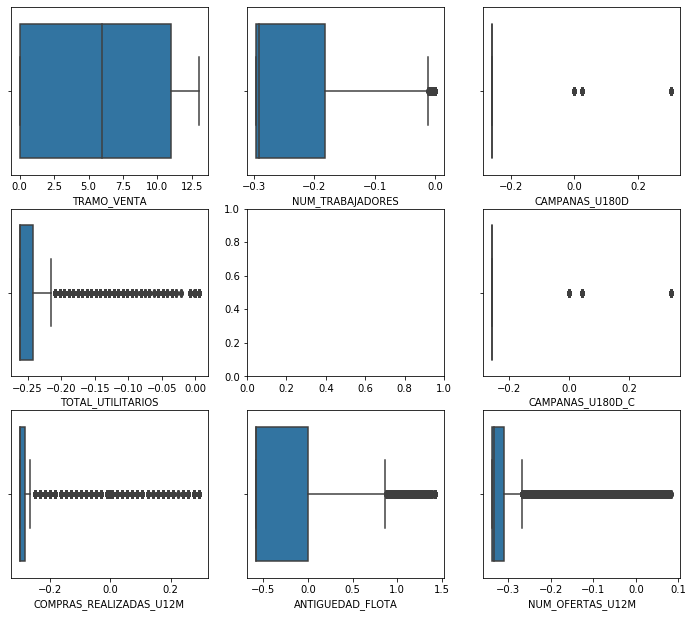

In [11]:
fig, axs = plt.subplots(3,3, figsize = (12,10.5))
plt2 = sns.boxplot(df2['TRAMO_VENTA'], ax = axs[0,0])
plt2 = sns.boxplot(df2['NUM_TRABAJADORES'], ax = axs[0,1])
plt2 = sns.boxplot(df2['TOTAL_UTILITARIOS'], ax = axs[1,0])
plt2 = sns.boxplot(df2['ANTIGUEDAD_FLOTA'], ax = axs[2,1])
plt2 = sns.boxplot(df2['CAMPANAS_U180D_C'], ax = axs[1,2])
plt2 = sns.boxplot(df2['NUM_OFERTAS_U12M'], ax = axs[2,2])
plt2 = sns.boxplot(df2['CAMPANAS_U180D'], ax = axs[0,2])
plt2 = sns.boxplot(df2['COMPRAS_REALIZADAS_U12M'], ax = axs[2,0])

plt.show()

In [12]:
conversion = (sum(df2['COMPRO_NUM'])/len(df2['COMPRO_NUM'].index))*100
conversion

8.37529784568523

Una conversion tan baja requiere balance de la información

In [19]:
y=df2["COMPRO_NUM"]
x=df2.drop(["COMPRO_NUM",'FAMILIA_TIPO_VEHICULO'], axis=1)

In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81418 entries, 165526 to 246943
Data columns (total 96 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RUBRO_ECOM_A             81418 non-null  float64
 1   RUBRO_ECOM_B             81418 non-null  float64
 2   RUBRO_ECOM_C             81418 non-null  float64
 3   RUBRO_ECOM_D             81418 non-null  float64
 4   RUBRO_ECOM_E             81418 non-null  float64
 5   RUBRO_ECOM_F             81418 non-null  float64
 6   RUBRO_ECOM_G             81418 non-null  float64
 7   RUBRO_ECOM_H             81418 non-null  float64
 8   RUBRO_ECOM_I             81418 non-null  float64
 9   RUBRO_ECOM_J             81418 non-null  float64
 10  RUBRO_ECOM_K             81418 non-null  float64
 11  RUBRO_ECOM_L             81418 non-null  float64
 12  RUBRO_ECOM_M             81418 non-null  float64
 13  RUBRO_ECOM_N             81418 non-null  float64
 14  RUBRO_ECOM_O    

# Inicio de modelamiento

como esta desbalanceado, primero divido la muestra pero por estratos

In [21]:
x_res,x_test,y_res,y_test=train_test_split(x,y,test_size=0.2,random_state=1010)

Revisamos como quedan las separaciones

In [22]:
y_res.mean(),y_test.mean(),y_res.shape,y_test.shape

(0.0832437743728314, 0.0857897322525178, (65134,), (16284,))

### Balanceo de datos de entrenamiento

Tengo la opcion de bajar o subir la muestra, a modo de no perder informacion se sube

In [27]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 
nm = SMOTE(random_state = 10101) 
#nm = NearMiss(random_state = 10101)

Using TensorFlow backend.


In [28]:
x_train,y_train=nm.fit_resample(x_res,y_res)

Reviso dimenciones nuevamente

In [29]:
y_res.shape, y_res.mean(), y_train.shape,y_train.mean()

((65134,), 0.0832437743728314, (119424,), 0.5)

paso de 151 mil datos de entrenamiento a 280, mediante resample

# Modelamiento con datos balanceados

## Multi-modelos

Para evita probar uno a uno los modelos, se seleccionan varios y luego se verifica los con mejor rendimiento para hacer una busqueda ampliada de los mejores con gridsearch

In [ ]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier,StackingClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier          
from sklearn.model_selection import GridSearchCV
              


    
logistico_grid={"C":np.logspace(-3,3,3), "penalty":["l2"]}

tree_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(1,8,1)), 
              "min_samples_leaf": list(range(5,18,1))}

rf_grid = {
    'n_estimators'      : [25,30,50],
    'max_depth'         : [8,10,15],
    'random_state'      : [0]}

ada_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}


mlp_grid = {'solver': ['lbfgs'], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[10101]}



modelos = [["LR","SVC","RF","TREE","MLP","GBOOST","ADABOOST","GRBOOST"],
           [
            GridSearchCV(LogisticRegression(),logistico_grid,cv=5,scoring='roc_auc'),  
            svm.SVC(max_iter=50),
            GridSearchCV(RandomForestClassifier(),rf_grid, cv=5,scoring='roc_auc'),
            GridSearchCV(DecisionTreeClassifier(),tree_grid, cv=5,scoring='roc_auc'),
            GridSearchCV(MLPClassifier(),mlp_grid,cv=5,scoring='roc_auc'),
            GaussianNB(),
            GridSearchCV(AdaBoostClassifier(),ada_grid,scoring='roc_auc',cv=5),
            GradientBoostingClassifier()]
          ]
warnings.filterwarnings("ignore")

resultados=[]
predicion=[]
error=[]
precision=[]
a=0
for i in modelos[1]:
    ajuste=i.fit(x_train,y_train)
    resultados.append(ajuste)
    predicion.append(ajuste.predict(x_test))
    er = i.score(x_test,y_test)
    error.append(er)
    precision.append(ajuste.score(x_test , y_test))
    print("\n modelo:",modelos[0][a])
    print(mediciones2(x_train,y_train,x_test,y_test,ajuste))
    print("f1 score:",int(f1_score(y_test,ajuste.predict(x_test))*1000)/1000)
    if modelos[0][a]!='SVC':
        print("roc-auc:", roc_auc_score(y_test,ajuste.predict_proba(x_test)[:,1]))
    print(confusion_matrix(y_test,ajuste.predict(x_test)))
    a=a+1


 modelo: LR
          Testeo
Accuracy   0.695
recall     0.927
f1 score: 0.343
roc-auc: 0.8454881462301137
[[10027  4860]
 [  101  1296]]

 modelo: SVC
          Testeo
Accuracy   0.740
recall     0.201
f1 score: 0.117
[[11783  3104]
 [ 1116   281]]

 modelo: RF
          Testeo
Accuracy   0.803
recall     0.653
f1 score: 0.363
roc-auc: 0.8418113904994338
[[12173  2714]
 [  484   913]]

 modelo: TREE
          Testeo
Accuracy   0.728
recall     0.837
f1 score: 0.346
roc-auc: 0.8320547840739055
[[10696  4191]
 [  227  1170]]
Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] alpha=0.1, hidden_layer_sizes=10, random_state=10101, solver=lbfgs 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0.1, hidden_layer_sizes=10, random_state=10101, solver=lbfgs, score=0.862, total=  14.3s
[CV] alpha=0.1, hidden_layer_sizes=10, random_state=10101, solver=lbfgs 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.3s remaining:    0.0s


[CV]  alpha=0.1, hidden_layer_sizes=10, random_state=10101, solver=lbfgs, score=0.862, total=  13.8s
[CV] alpha=0.1, hidden_layer_sizes=10, random_state=10101, solver=lbfgs 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   28.1s remaining:    0.0s


[CV]  alpha=0.1, hidden_layer_sizes=10, random_state=10101, solver=lbfgs, score=0.861, total=  12.9s
[CV] alpha=0.1, hidden_layer_sizes=11, random_state=10101, solver=lbfgs 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   41.0s remaining:    0.0s


[CV]  alpha=0.1, hidden_layer_sizes=11, random_state=10101, solver=lbfgs, score=0.857, total=  14.2s
[CV] alpha=0.1, hidden_layer_sizes=11, random_state=10101, solver=lbfgs 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   55.3s remaining:    0.0s


[CV]  alpha=0.1, hidden_layer_sizes=11, random_state=10101, solver=lbfgs, score=0.861, total=  14.1s
[CV] alpha=0.1, hidden_layer_sizes=11, random_state=10101, solver=lbfgs 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s


[CV]  alpha=0.1, hidden_layer_sizes=11, random_state=10101, solver=lbfgs, score=0.856, total=  14.2s
[CV] alpha=0.1, hidden_layer_sizes=12, random_state=10101, solver=lbfgs 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.4min remaining:    0.0s


[CV]  alpha=0.1, hidden_layer_sizes=12, random_state=10101, solver=lbfgs, score=0.856, total=  14.7s
[CV] alpha=0.1, hidden_layer_sizes=12, random_state=10101, solver=lbfgs 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.6min remaining:    0.0s


[CV]  alpha=0.1, hidden_layer_sizes=12, random_state=10101, solver=lbfgs, score=0.864, total=  13.7s
[CV] alpha=0.1, hidden_layer_sizes=12, random_state=10101, solver=lbfgs 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.9min remaining:    0.0s


[CV]  alpha=0.1, hidden_layer_sizes=12, random_state=10101, solver=lbfgs, score=0.858, total=  14.2s
[CV] alpha=0.1, hidden_layer_sizes=13, random_state=10101, solver=lbfgs 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.1min remaining:    0.0s


[CV]  alpha=0.1, hidden_layer_sizes=13, random_state=10101, solver=lbfgs, score=0.857, total=  16.7s
[CV] alpha=0.1, hidden_layer_sizes=13, random_state=10101, solver=lbfgs 
[CV]  alpha=0.1, hidden_layer_sizes=13, random_state=10101, solver=lbfgs, score=0.866, total=  16.3s
[CV] alpha=0.1, hidden_layer_sizes=13, random_state=10101, solver=lbfgs 
[CV]  alpha=0.1, hidden_layer_sizes=13, random_state=10101, solver=lbfgs, score=0.860, total=  15.6s
[CV] alpha=0.1, hidden_layer_sizes=14, random_state=10101, solver=lbfgs 
[CV]  alpha=0.1, hidden_layer_sizes=14, random_state=10101, solver=lbfgs, score=0.860, total=  16.3s
[CV] alpha=0.1, hidden_layer_sizes=14, random_state=10101, solver=lbfgs 
[CV]  alpha=0.1, hidden_layer_sizes=14, random_state=10101, solver=lbfgs, score=0.864, total=  17.3s
[CV] alpha=0.1, hidden_layer_sizes=14, random_state=10101, solver=lbfgs 
[CV]  alpha=0.1, hidden_layer_sizes=14, random_state=10101, solver=lbfgs, score=0.861, total=  16.9s
[CV] alpha=0.01, hidden_layer

[CV]  alpha=0.0001, hidden_layer_sizes=13, random_state=10101, solver=lbfgs, score=0.857, total=  18.1s
[CV] alpha=0.0001, hidden_layer_sizes=14, random_state=10101, solver=lbfgs 
[CV]  alpha=0.0001, hidden_layer_sizes=14, random_state=10101, solver=lbfgs, score=0.860, total=  17.8s
[CV] alpha=0.0001, hidden_layer_sizes=14, random_state=10101, solver=lbfgs 
[CV]  alpha=0.0001, hidden_layer_sizes=14, random_state=10101, solver=lbfgs, score=0.865, total=  19.5s
[CV] alpha=0.0001, hidden_layer_sizes=14, random_state=10101, solver=lbfgs 
[CV]  alpha=0.0001, hidden_layer_sizes=14, random_state=10101, solver=lbfgs, score=0.859, total=  17.3s
[CV] alpha=1e-05, hidden_layer_sizes=10, random_state=10101, solver=lbfgs 
[CV]  alpha=1e-05, hidden_layer_sizes=10, random_state=10101, solver=lbfgs, score=0.860, total=  13.7s
[CV] alpha=1e-05, hidden_layer_sizes=10, random_state=10101, solver=lbfgs 
[CV]  alpha=1e-05, hidden_layer_sizes=10, random_state=10101, solver=lbfgs, score=0.866, total=  13.5s


[CV]  alpha=1e-07, hidden_layer_sizes=14, random_state=10101, solver=lbfgs, score=0.860, total=  17.8s
[CV] alpha=1e-07, hidden_layer_sizes=14, random_state=10101, solver=lbfgs 
[CV]  alpha=1e-07, hidden_layer_sizes=14, random_state=10101, solver=lbfgs, score=0.862, total=  17.0s
[CV] alpha=1e-07, hidden_layer_sizes=14, random_state=10101, solver=lbfgs 
[CV]  alpha=1e-07, hidden_layer_sizes=14, random_state=10101, solver=lbfgs, score=0.859, total=  16.6s
[CV] alpha=1e-08, hidden_layer_sizes=10, random_state=10101, solver=lbfgs 
[CV]  alpha=1e-08, hidden_layer_sizes=10, random_state=10101, solver=lbfgs, score=0.860, total=  14.4s
[CV] alpha=1e-08, hidden_layer_sizes=10, random_state=10101, solver=lbfgs 
[CV]  alpha=1e-08, hidden_layer_sizes=10, random_state=10101, solver=lbfgs, score=0.866, total=  14.2s
[CV] alpha=1e-08, hidden_layer_sizes=10, random_state=10101, solver=lbfgs 
[CV]  alpha=1e-08, hidden_layer_sizes=10, random_state=10101, solver=lbfgs, score=0.857, total=  13.0s
[CV] al

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 35.2min finished



 modelo: MLP
          Testeo
Accuracy   0.678
recall     0.948
f1 score: 0.336
roc-auc: 0.8447703071081074
[[9725 5162]
 [  72 1325]]

 modelo: GBOOST
          Testeo
Accuracy   0.266
recall     0.911
f1 score: 0.175
roc-auc: 0.7075875676938064
[[ 3074 11813]
 [  124  1273]]


# Cual tiene un mejor ROC

In [ ]:
ajuste

# Conclusión Vans

En todos los modelos balaneados es posible apreciar un sobre ajuste de los valores, sin embargo es importante indicar que para el problema en cuestion es prioritario no desechar lead buenos e intentar desechar lead malos. por este motivo busco el mejor equilibrio entre recall y accuracy, evitando descuidar el presicion.

Tal contexto lleva a dejar al modelo GS con el mejor comportamiento.

Confusion matrix Random Forest:
 [[8883 2502]
 [ 253  817]]


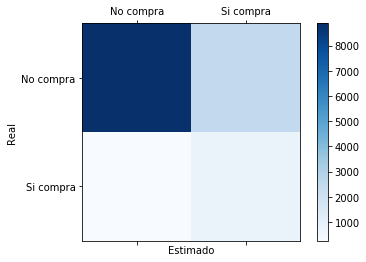

In [202]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=gs.predict(x_test))
print('Confusion matrix Random Forest:\n', conf_mat)

labels = ['No compra', 'Si compra']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Estimado')
plt.ylabel('Real')
plt.show()

In [ ]:
log_reg_pred = logreg_cv.predict_proba(x_test)[:,1]
rf_pred = rf_cv.predict_proba(x_test)[:,1]
ada_pred = gs.predict_proba(x_test)[:,1]
rn_pred = mlp_cv.predict_proba(x_test)[:,1]

log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, rf_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, ada_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test,rn_pred)


plt.figure(figsize=(16,8))
plt.title('Curva ROC \n Top 4 Clasificadores', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Regresión logistica Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred)))
plt.plot(knear_fpr, knear_tpr, label='Random Forest Score: {:.4f}'.format(roc_auc_score(y_test, rf_pred)))
plt.plot(svc_fpr, svc_tpr, label='AdaBoost: {:.4f}'.format(roc_auc_score(y_test, ada_pred)))
plt.plot(tree_fpr, tree_tpr, label='Red neuronal Score: {:.4f}'.format(roc_auc_score(y_test, rn_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('Falso Positivo', fontsize=16)
plt.ylabel('Verdadero Positivo', fontsize=16)
plt.annotate('Roc minimo 50% \n (Este es el minimo score a obtener)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()
    
plt.show()

# Exportación del modelo

In [203]:
import pickle

filename = 'lead_score_vans_empresa_modelo.sav'

pickle.dump(gs, open(filename, 'wb'))

Importancia de variables

In [ ]:
from itertools import accumulate
importancia= pd.DataFrame(list(zip(x_train.columns, gs.best_estimator_.feature_importances_)),columns =['variable','importancia'])
importancia2 = importancia.sort_values(by=['importancia'],ascending=0)
importancia2["acumulado"]=list(accumulate(importancia2["importancia"]))

In [ ]:
listado=importancia2[importancia2['acumulado']<=0.95]["variable"]